<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# reading the data set
learn_df = pd.read_csv(r'C:\Users\Tamanna Kawatra\OneDrive\Desktop\Bain Hackathon\train.csv')
learn_test_df = pd.read_csv(r'C:\Users\Tamanna Kawatra\OneDrive\Desktop\Bain Hackathon\test.csv')
learn_df.head()
learn_df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [3]:
learn_df.info()
learn_test_df.info()
##only null values in competion metric  column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
ID                    512087 non-null int64
Day_No                512087 non-null int64
Course_ID             512087 non-null int64
Course_Domain         512087 non-null object
Course_Type           512087 non-null object
Short_Promotion       512087 non-null int64
Public_Holiday        512087 non-null int64
Long_Promotion        512087 non-null int64
User_Traffic          512087 non-null int64
Competition_Metric    510323 non-null float64
Sales                 512087 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 10 columns):
ID                    36000 non-null int64
Day_No                36000 non-null int64
Course_ID             36000 non-null int64
Course_Domain         36000 non-null object
Course_Type           36000 non-null object
Short_Promot

In [4]:
#dropping unwanted columns
learn_df1 = learn_df.drop(columns = ['ID', 'Course_ID'])
learn_test_df1 = learn_test_df.drop(columns = ['ID', 'Course_ID' ])

learn_df1.head()
learn_df1.head()

,Day_No,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,Development,Course,0,1,1,11004,0.007,81
1,2,Development,Course,0,0,1,13650,0.007,79
2,3,Development,Course,0,0,1,11655,0.007,75
3,4,Development,Course,0,0,1,12054,0.007,80
4,5,Development,Course,0,0,1,6804,0.007,41


In [5]:
#categorizing into discrete, categorical and continuous variables
categorical = [var for var in learn_df1.columns if learn_df1[var].dtype=='O']
numerical = [var for var in learn_df1.columns if learn_df1[var].dtype!='O']
discrete  = [var for var in numerical if len(learn_df1[var].unique()) < 20 ]
continuous = [var for var in numerical if var not in discrete and var not in ['Sales'] ]


categorical1 = [var for var in learn_test_df1.columns if learn_test_df1[var].dtype=='O']
numerical1 = [var for var in learn_test_df1.columns if learn_test_df1[var].dtype!='O']
discrete1  = [var for var in numerical1 if len(learn_test_df1[var].unique()) < 20 ]
continuous1 = [var for var in numerical1 if var not in discrete and var not in ['Sales'] ]


print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')

There are 2 categorical variables
There are 3 discrete variables
There are 3 continuous variables


In [6]:
# Output variables with NA and the percentage of NA

for var in learn_df1.columns:
    if learn_df1[var].isnull().sum() > 0:
        print(var, learn_df1[var].isnull().mean())
        
for var in learn_test_df1.columns:
    if learn_test_df1[var].isnull().sum() > 0:
        print(var, learn_test_df1[var].isnull().mean())
        
        

Competition_Metric 0.0034447271655011747
Competition_Metric 0.0033333333333333335


In [7]:
for var in discrete :
    print(var, learn_df1[var].unique(), '\n')

Short_Promotion [0 1] 

Public_Holiday [1 0] 

Long_Promotion [1 0] 



In [8]:
for var in continuous:
    print(var, learn_df1[var].unique()[0:20], '\n')

Day_No [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

User_Traffic [11004 13650 11655 12054  6804 10395 16023 14385 16485 13377 11319  7077
 11802 11130 10773 12411  8463  9114  6363  8547] 

Competition_Metric [0.007 0.186 0.316 0.099 0.027 0.041 0.012 0.014 0.004 0.017 0.054 0.182
 0.042 0.013 0.06  0.001 0.    0.129 0.029 0.101] 



In [9]:
for var in categorical:
    print(var, learn_df1[var].unique(), '\n')

Course_Domain ['Development' 'Software Marketing' 'Finance & Accounting' 'Business'] 

Course_Type ['Course' 'Program' 'Degree'] 



In [10]:
#outliers in data
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

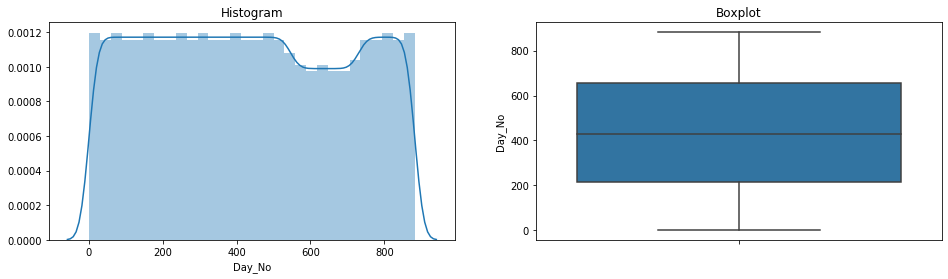

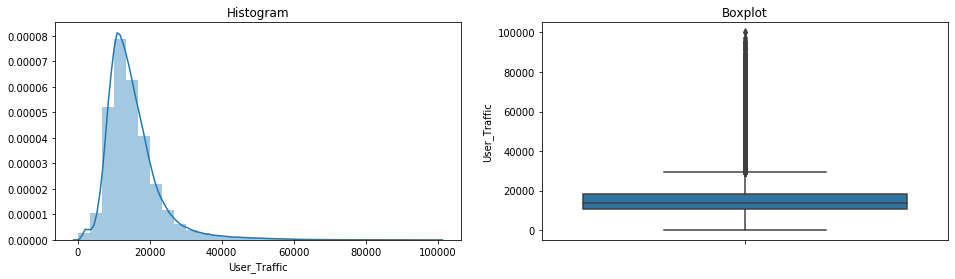

C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


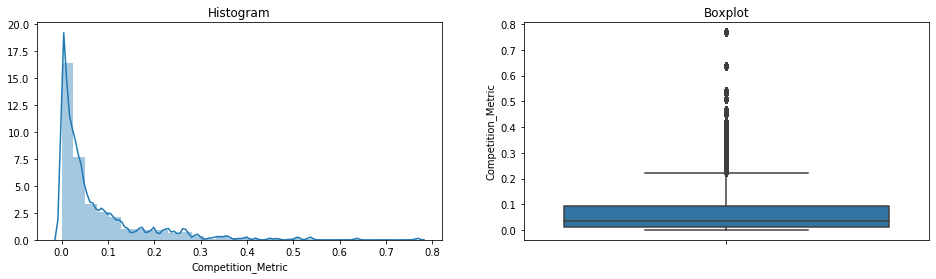

In [11]:
for var in continuous:
    diagnostic_plots(learn_df1, var)

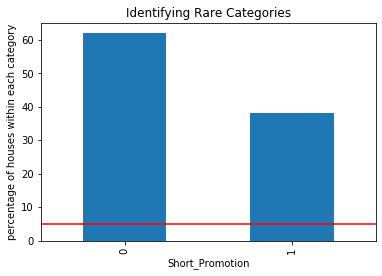

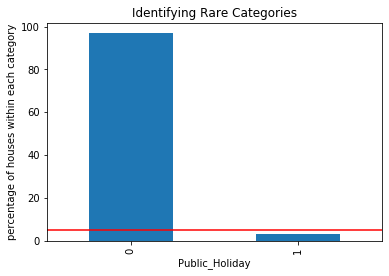

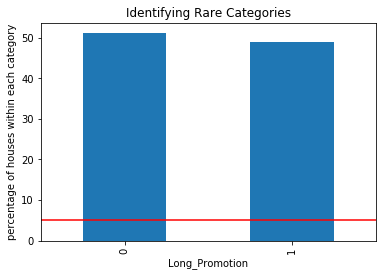

In [12]:
 #outliers in discrete variables

for var in discrete:
    freq_var = 100*(learn_df1[var].value_counts() / len(learn_df1))
    # let's make plot with the category frequencies
    fig = freq_var.sort_values(ascending=False).plot.bar()

    # add a line to signal 5 % frequency limit
    # under which we will consider a category as rare
    fig.axhline(y=5, color='red')

    # add axis labels and title
    fig.set_ylabel('percentage of houses within each category')
    fig.set_xlabel(var)
    fig.set_title('Identifying Rare Categories')
    plt.show()

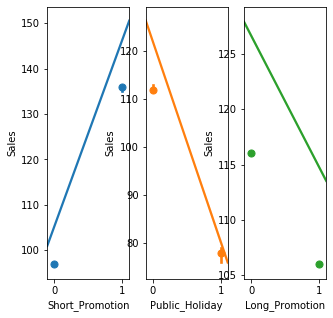

In [13]:
# let's plot the median sale price per value of the discrete
# variable
fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(5,5))
axs = axs.flatten()

for i, var in enumerate(discrete):
    if var != "Sales":
        sns.regplot(x=var, y="Sales", data=learn_df1, ax=axs[i],x_estimator=np.median);

In [14]:
corrmatrix = learn_df1.corr()
print(corrmatrix)

                      Day_No  Short_Promotion  Public_Holiday  Long_Promotion  \
Day_No              1.000000         0.014645        0.019112       -0.020204   
Short_Promotion     0.014645         1.000000       -0.018770       -0.001149   
Public_Holiday      0.019112        -0.018770        1.000000        0.008319   
Long_Promotion     -0.020204        -0.001149        0.008319        1.000000   
User_Traffic        0.021511         0.198785       -0.108305       -0.204289   
Competition_Metric  0.003229         0.000182       -0.000491       -0.119382   
Sales               0.060012         0.367762       -0.135052       -0.109455   

                    User_Traffic  Competition_Metric     Sales  
Day_No                  0.021511            0.003229  0.060012  
Short_Promotion         0.198785            0.000182  0.367762  
Public_Holiday         -0.108305           -0.000491 -0.135052  
Long_Promotion         -0.204289           -0.119382 -0.109455  
User_Traffic            1.

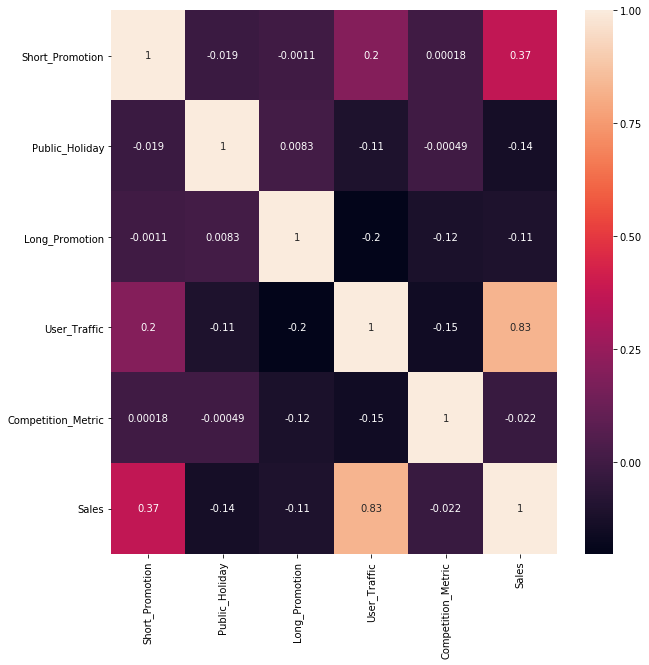

In [182]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(corrmatrix, annot=True ,ax = ax)

In [15]:
X_train= learn_df1.drop(['Sales' ], axis = 1)
feature_list = list(X_train.columns)
y_train= learn_df1['Sales']
X_test = learn_test_df1
print(feature_list)

['Day_No', 'Course_Domain', 'Course_Type', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic', 'Competition_Metric']


In [16]:
from feature_engine.outlier_removers import Winsorizer
winsorizer = Winsorizer(distribution='skewed', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=[ 'User_Traffic' , 'Competition_Metric'])

winsorizer.fit(X_train)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['User_Traffic', 'Competition_Metric'])

In [17]:
X_train_t = winsorizer.transform(X_train)
X_test_t = winsorizer.transform(X_test)

In [18]:
#data preprocessing


# import relevant modules for feature engineering
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import YeoJohnsonTransformer
from sklearn.preprocessing import StandardScaler
from feature_engine.discretisers import DecisionTreeDiscretiser
from feature_engine.variable_transformers import LogTransformer
X_train_t[discrete] = X_train_t[discrete].astype('O')
X_test_t[discrete] = X_test_t[discrete1].astype('O')



In [19]:
learn_preprocess = Pipeline([
    
    # missing data imputation 
    ('missing_ind', mdi.AddNaNBinaryImputer(
        variables=['Competition_Metric'])),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=['Competition_Metric'])),
   ('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),

    # categorical encoding 
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(
        tol=0.05, n_categories=6, variables=categorical+discrete)),
    ('onehotencoding_enc', ce. OneHotCategoricalEncoder(variables=categorical+discrete,
   
    drop_last=True)),
    ( 'lt',LogTransformer(variables = ['User_Traffic'])),
     # discretisation and encoding
    ('treeDisc',  DecisionTreeDiscretiser(cv=2,
                                   regression=True,
                                   param_grid={'max_depth': [1,2,3,4,5,6]})),

    # feature Scaling
    ('scaler', StandardScaler()),
    
    

])

In [20]:
learn_preprocess.fit(X_train_t, y_train)

Pipeline(memory=None,
         steps=[('missing_ind',
                 AddNaNBinaryImputer(variables=['Competition_Metric'])),
                ('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['Competition_Metric'])),
                ('imputer_cat',
                 CategoricalVariableImputer(variables=['Course_Domain',
                                                       'Course_Type'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=6, tol=0.05,
                                             v...
                                         variables=['Day_No', 'User_Traffic',
                                                    'Competition_Metric',
                                                    'Competition_Metric_na',
                                                    'Course_Domain_Development',
                                                    'Course_Doma

In [21]:
# Apply Transformations
X_train=learn_preprocess.transform(X_train_t)
X_test=learn_preprocess.transform(X_test_t)


In [22]:
X_train


array([[-0.57593582, -0.55946244, -0.24777127, ..., -0.78328678,
        -5.53230572, -1.0223135 ],
       [-0.57593582, -0.13671665, -0.24777127, ..., -0.78328678,
         0.18075646, -1.0223135 ],
       [-0.57593582, -0.48720967, -0.24777127, ..., -0.78328678,
         0.18075646, -1.0223135 ],
       ...,
       [ 0.18636065, -0.13671665, -0.24777127, ..., -0.78328678,
         0.18075646, -1.0223135 ],
       [ 0.18636065, -0.98067711, -0.24777127, ..., -0.78328678,
         0.18075646, -1.0223135 ],
       [ 0.18636065, -0.48720967, -0.24777127, ...,  1.27667161,
         0.18075646, -1.0223135 ]])

In [23]:
# Tuning the models

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

In [24]:
lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv=5)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores))
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

print()
# Print Co-efficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# Check test data set performance
print("LR Performance: ", lr.score(X_train,y_train))
X_test_preds = lr.predict(X_test)
print(X_test_preds)
np.savetxt("output.csv", X_test_preds, delimiter=",")

Mean Cross-validation scores: [-20.39614429 -25.95103761 -27.45782344 -24.14358443 -21.92205796]
Accuracy: -23.97 (+/- 5.14)

lr.coef_: [ 4.12594110e+00  4.83856192e+01 -3.42282332e+00  1.21106698e-02
 -1.12271994e+01 -1.97813607e+01  5.77150993e+00 -2.18317262e+01
  2.56552556e+01  8.12564207e+00  2.85259383e-02 -3.52000342e+00]
lr.intercept_: 120.82692394065703
LR Performance:  0.8097260159843876
[140.0598846  140.0598846  140.0598846  ... 142.65428196 142.65428196
 142.65428196]


In [41]:

from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 1000 ,random_state=0)

#define a list of parameters
param_lasso = {'alpha':[0.00001,0.001, 0.01, 0.1,0.5,0.7, 1, 10, 100,150,200,300] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=10, scoring = 'neg_root_mean_squared_error', return_train_score = True)
grid_lasso.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print()

#find best parameters
print('Lasso parameters: ', grid_lasso.best_params_)

# print co-eff

print("Lasso.coef_:", grid_lasso.best_estimator_.coef_)
print("Lasso.intercept_:", grid_lasso.best_estimator_.intercept_)
# Check Train performance
print("Lasso Train Performance: ", grid_lasso.score(X_train,y_train))
X_test_preds = grid_lasso.predict(X_test)
print(X_test_preds)
np.savetxt("output2.csv", X_test_preds, delimiter=",")


C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121560882.1473718, tolerance: 139782.19503265695
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98284068.31843293, tolerance: 140585.83960898532
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94527962.64654623, tolerance: 132345.24206595687
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent

Best Mean Cross-validation score: -23.84

Lasso parameters:  {'alpha': 0.001}
Lasso.coef_: [ 4.12610704e+00  4.83794002e+01 -3.42068021e+00  1.12121094e-02
 -1.11986126e+01 -1.97533616e+01  5.75111222e+00 -2.16974506e+01
  2.55218088e+01  8.12601909e+00  2.83364926e-02 -3.51784542e+00]
Lasso.intercept_: 120.82692394065703
Lasso Train Performance:  -23.70996891576061
[140.05459113 140.05459113 140.05459113 ... 142.65118638 142.65118638
 142.65118638]


In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100,115,122,140,150,200 ,300 , 400 , 500 , 600 , 700] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=15, scoring = 'neg_root_mean_squared_error',return_train_score = True)
grid_ridge.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_ridge.best_score_))

print()

#find best parameters
print('Ridge parameters: ', grid_ridge.best_params_)

# print co-eff

print("Ridge.coef_:", grid_ridge.best_estimator_.coef_)
print("Ridge.intercept_:", grid_ridge.best_estimator_.intercept_)

# Check test data set performance

print("Ridge Test Performance: ", grid_ridge.score(X_train,y_train))
X_test_preds = grid_ridge.predict(X_test)
print(X_test_preds)
np.savetxt("output3.csv", X_test_preds, delimiter=",")


Best Mean Cross-validation score: -23.79

Ridge parameters:  {'alpha': 600}
Ridge.coef_: [ 4.14712752e+00  4.82184555e+01 -3.37930102e+00  1.42726776e-02
 -1.13930502e+01 -1.98980728e+01  5.90386614e+00 -1.80283705e+01
  2.18618850e+01  8.14916477e+00  4.84417379e-02 -3.48280233e+00]
Ridge.intercept_: 120.82692394065703
Ridge Test Performance:  -23.71377982580449
[139.99452814 139.99452814 139.99452814 ... 142.61061765 142.61061765
 142.61061765]


In [201]:
model_gs = Pipeline([("regressor", LinearRegression())])
model_parm_gd = [
    { 'regressor': [LinearRegression()]},
    
    { 'regressor': [Ridge()],
      'regressor__alpha':[0.001, 0.01, 0.1, 1, 10, 100,115,122,140,150,200, 300 , 400 , 500] },
    
    { 'regressor': [Lasso(random_state=0 , max_iter = 1000)],
      'regressor__alpha':[0.00001,0.001, 0.01, 0.1,0.5,0.7, 1, 10, 100,150,200,300,400,500,550,600,700,750,800,900]},
 { 'regressor': [ElasticNet(random_state=0)],
      'regressor__alpha':[0.00001,0.001, 0.01, 0.1,0.5,0.7, 1, 10, 100,150,200,300,400,500,550,600,700,750,800,900]}
]

In [202]:
grid_search_learn = GridSearchCV(model_gs, model_parm_gd ,scoring = 'neg_root_mean_squared_error', cv = 15)

In [203]:
grid_search_learn.fit(X_train,y_train)

C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108764466.10482754, tolerance: 144370.9128861451
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129581617.23810074, tolerance: 142462.78565184848
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110239024.50037928, tolerance: 144834.41775243694
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15146766.01471147, tolerance: 144187.09827458562
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275866.1470169723, tolerance: 138624.8344493181
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454406.6534487903, tolerance: 138954.41942221246
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14633519.036350667, tolerance: 138954.41942221246
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366181.44845080376, tolerance: 142146.6959713499
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399329.6416298747, tolerance: 144468.4375924182
  positive)
C:\Users\Tamanna Kawatra\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_coordinate_descent

GridSearchCV(cv=15, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'regressor': [LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False)]},
                         {'regressor': [Ridge(alpha=500, copy_X...
                                                   l1_ratio=0.5, max_iter=1000,
                                      

In [204]:
print(grid_search_learn.best_params_)

{'regressor': Ridge(alpha=500, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), 'regressor__alpha': 500}


In [205]:
# let's get the predictions
X_train_preds = grid_search_learn.predict(X_train)
X_test_preds = grid_search_learn.predict(X_test)

In [206]:
print("Best Mean Cross-validation score: {:.2f}".format(grid_search_learn.best_score_))

Best Mean Cross-validation score: -24.12


In [207]:
# check model performance:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
#print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
#print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
#print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 577.9125002427891
train rmse: 24.03981073641781
train r2: 0.8043950614178073



In [208]:
np.savetxt("output4.csv", X_test_preds, delimiter=",")

In [ ]:
param_grid = param_grid = [
  {'kernel': [('linear')],'C': [0.01,1,1, 10, 100], 'epsilon':[0.1,0.2,0.5,0.3]},
  {'kernel': [('poly')],'degree': [2,3,4,5], 'C': [0.01,1,1, 10, 100], 'gamma': [0,1,0.1,0.01,0.001] ,'epsilon':[0.1,0.2,0.5,0.3] }, 
    {'kernel': [('rbf'), ('sigmoid')], 'C': [0.01,1,1, 10, 100], 'gamma': [0,1,0.1,0.01,0.001] ,'epsilon':[0.1,0.2,0.5,0.3]}]
    
svr = SVR()
clf = GridSearchCV(svr, param_grid, cv = 15)
clf.fit(X_train,y_train)
print(clf.best_params_)
X_train_preds = clf.predict(X_train)
X_test_preds = clf.predict(X_test)
np.savetxt("output1.csv", X_test_preds, delimiter=",")
print("Best Mean Cross-validation score: {:.2f}".format(clf.best_score_))
#print("SVR Test Performance: ", clf.score(X_test,y_test))
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(Y, X_train_preds))))
print('train r2: {}'.format(r2_score(Y, X_train_preds)))
#print()
#print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
#print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
#print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
pipe_knn=Pipeline([ 
    ('knnreg', KNeighborsRegressor())])
# define a list of parameters
#param_knn = {'n_neighbors': [5, 10, 15, 20, 25, 30]}
param_knn = {'knnreg__n_neighbors': range(1,25)}

#apply grid search
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

print('train score: ', grid_knn.score(X_train, y_train))
#print('test score: ', grid_knn.score(X_test, y_test))
X_test_preds = grid_knn.predict(X_test)
np.savetxt("output1.csv", X_test_preds, delimiter=",")
#find best parameters
print('Best parameters: ', grid_knn.best_params_)
print('Best cross-validation score:', grid_knn.best_score_)

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error




dtm = DecisionTreeRegressor()

param_grid = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}
              



grid_cv_dtm = GridSearchCV(dtm, param_grid, scoring = 'neg_mean_squared_log_error' , cv=5)

grid_cv_dtm.fit(X_train,y_train)


print("R-Squared on train dataset={}".format(grid_cv_dtm.score(X_train,y_train)))
X_test_preds = grid_cv_dtm.predict(X_test)
print(X_test_preds)
np.savetxt("output1.csv", X_test_preds, delimiter=",")

#print("R-Squaredon test dataset={}".format(grid_cv_dtm.score(X_test,y_test)))

R-Squared on train dataset=-0.09631801809834543
[118.22324802 118.22324802 118.22324802 ... 118.22324802 118.22324802
 118.22324802]


In [25]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train);

In [26]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

In [27]:
np.savetxt("output5.csv",predictions , delimiter=",")

In [28]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

print(importances)

Variable: Course_Domain        Importance: 0.84
Variable: Long_Promotion       Importance: 0.05
Variable: Day_No               Importance: 0.02
Variable: Course_Type          Importance: 0.01
Variable: Competition_Metric   Importance: 0.01
Variable: Short_Promotion      Importance: 0.0
Variable: Public_Holiday       Importance: 0.0
Variable: User_Traffic         Importance: 0.0
[0.02483104424973705, 0.8434455371912346, 0.008136137288396851, 0.00019280097743526814, 0.0038339373195529435, 0.05042538725060769, 0.0023610300630080047, 0.0062300232795420435, 0.009795770837075038, 0.03794652173557998, 0.0021402060223227617, 0.01066160378550766]


In [29]:

rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Course_Domain'), feature_list.index('Long_Promotion')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

In [244]:
np.savetxt("output6.csv",predictions , delimiter=",")

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [31]:

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
boosting = clf.predict(X_test)
np.savetxt("output7.csv",boosting, delimiter=",")
#mse = mean_squared_error(y_test, clf.predict(X_test))
#print("MSE: %.4f" % mse)
